In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
from utils.neural_net import NeuralNetVol, ResNeuralNetVol, ResNeuralNetVolSd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
from utils.rough_vol import RoughVol

In [3]:
data = pd.read_csv('oxfordmanrealizedvolatilityindices.csv')

In [4]:
data.head()

,Unnamed: 0,Symbol,open_price,rk_twoscale,close_price,open_to_close,rv10_ss,rk_parzen,medrv,open_time,rv5,nobs,rv5_ss,rsv,rv10,bv,rk_th2,close_time,bv_ss,rsv_ss
0,2000-01-03 00:00:00+00:00,.AEX,675.67,0.000103,675.44,-0.000340,0.000178,0.000179,0.000050,90101.0,0.000130,1795.0,0.000130,0.000046,0.000178,0.000100,0.000102,163015.0,0.000100,0.000046
1,2000-01-04 00:00:00+00:00,.AEX,664.20,0.000199,642.25,-0.033606,0.000261,0.000423,0.000075,90416.0,0.000201,1785.0,0.000201,0.000147,0.000261,0.000207,0.000201,163016.0,0.000207,0.000147
2,2000-01-05 00:00:00+00:00,.AEX,633.37,0.000325,632.31,-0.001675,0.000714,0.000324,0.000166,90016.0,0.000491,1801.0,0.000491,0.000328,0.000714,0.000361,0.000345,163016.0,0.000361,0.000328
3,2000-01-06 00:00:00+00:00,.AEX,632.46,0.000218,624.21,-0.013130,0.000182,0.000219,0.000152,90016.0,0.000225,1799.0,0.000225,0.000116,0.000182,0.000258,0.000221,163002.0,0.000258,0.000116
4,2000-01-07 00:00:00+00:00,.AEX,628.93,0.000126,644.86,0.025013,0.000157,0.000155,0.000039,90046.0,0.000138,1798.0,0.000138,0.000048,0.000157,0.000130,0.000123,163016.0,0.000130,0.000048


In [5]:
data.Symbol.unique()

array(['.AEX', '.AORD', '.BFX', '.BSESN', '.BVLG', '.BVSP', '.DJI',
       '.FCHI', '.FTMIB', '.FTSE', '.GDAXI', '.GSPTSE', '.HSI', '.IBEX',
       '.IXIC', '.KS11', '.KSE', '.MXX', '.N225', '.NSEI', '.OMXC20',
       '.OMXHPI', '.OMXSPI', '.OSEAX', '.RUT', '.SMSI', '.SPX', '.SSEC',
       '.SSMI', '.STI', '.STOXX50E'], dtype=object)

In [22]:
spx_rkth2 = np.sqrt(data.query('Symbol==".BVSP"').rk_th2.values)

In [23]:
nnet_model = ResNeuralNetVol(hiddenlayer=[])
roughvol_model = RoughVol(fit_period=200)

In [24]:
spx_rkth2.__len__()

4873

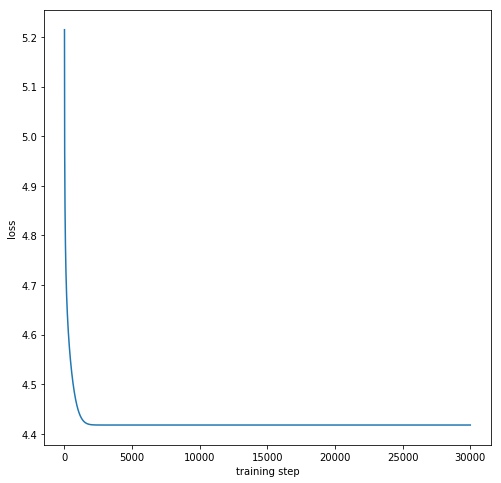

82.90779113769531

In [25]:
nnet_model.fit(spx_rkth2[:3000], draw_loss=True,steps=30000, lrs=[1e-3])

In [26]:
roughvol_model.fit(spx_rkth2[:3000])

0.1246913985612259

In [27]:
nnet_model.predict(spx_rkth2[3000:4000])

array([[0.00770016, 0.00846388, 0.00774465, ..., 0.01255355, 0.01192901,
        0.01132122],
       [0.00736665, 0.00700711, 0.0069839 , ..., 0.01214952, 0.0111226 ,
        0.01143272],
       [0.0065567 , 0.00662724, 0.00678609, ..., 0.01108017, 0.01139262,
        0.01161825],
       ...,
       [0.01091359, 0.00928909, 0.00965195, ..., 0.01040156, 0.01200435,
        0.01067753],
       [0.00838899, 0.00887975, 0.01016052, ..., 0.0119988 , 0.01059917,
        0.01040091],
       [0.00907546, 0.01035273, 0.01100119, ..., 0.01060874, 0.0104234 ,
        0.01059595]])

In [28]:
result=[]
for i in tqdm(range(100)):
    forward = i+1
    roughvol_model.forward = forward
    result.append(roughvol_model.predict(spx_rkth2[3000:4000]))
roughvol_result = np.array(result).T

In [29]:
nnet_result=nnet_model.predict(spx_rkth2[3000:4000])

In [30]:
spx_rkth2[3200:4000]

array([0.00579335, 0.00637025, 0.00621733, 0.00740418, 0.00828147,
       0.00804944, 0.00789597, 0.00913655, 0.00629964, 0.00683252,
       0.00539602, 0.00570529, 0.00577413, 0.00563416, 0.00329069,
       0.00470649, 0.00535628, 0.01000427, 0.00901092, 0.00918161,
       0.00951405, 0.00971575, 0.00769982, 0.00707569, 0.00715435,
       0.00722801, 0.00859039, 0.00881216, 0.00776695, 0.00410978,
       0.00643262, 0.00549719, 0.0066396 , 0.00894772, 0.01090572,
       0.00931575, 0.0096033 , 0.01067291, 0.00973013, 0.00923797,
       0.0105103 , 0.00713881, 0.00840263, 0.01056291, 0.01071181,
       0.01026844, 0.00870878, 0.00785466, 0.01144174, 0.01095043,
       0.00816971, 0.00825214, 0.00963421, 0.00693953, 0.00708547,
       0.00753419, 0.00780086, 0.00755452, 0.00758363, 0.0061688 ,
       0.00573343, 0.0077763 , 0.00978088, 0.00841525, 0.01277649,
       0.01029021, 0.00919934, 0.0110469 , 0.00739921, 0.01602754,
       0.01015415, 0.0118253 , 0.01223904, 0.01029543, 0.00907

In [31]:
roughvol_result.shape,  nnet_result.shape

((801, 100), (801, 100))

In [32]:
true_result = np.array([spx_rkth2[ele:ele+101] for ele in range(3199,4000)])

In [33]:
true_result.shape

(801, 101)

In [34]:
unconditional_var = np.mean((np.log(true_result[:,1:])-np.log(true_result[:,0][:,np.newaxis]))**2,axis=0)

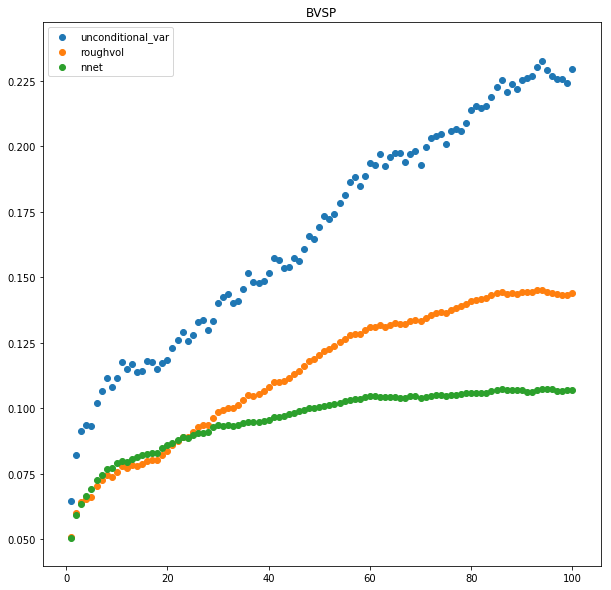

In [35]:
plt.figure(figsize=(10,10))
plt.scatter(np.arange(1,101),unconditional_var)
plt.scatter(np.arange(1,101),np.mean((np.log(true_result[:,1:]) - np.log(roughvol_result))**2,axis=0))
plt.scatter(np.arange(1,101),np.mean((np.log(true_result[:,1:]) - np.log(nnet_result))**2,axis=0))
plt.title('BVSP')
plt.legend(['unconditional_var', 'roughvol','nnet'])

In [20]:
np.mean((np.log(true_result[:,1:]) - np.log(roughvol_result))**2,axis=0)

array([0.04916946, 0.06091254, 0.06858834, 0.07551569, 0.07898785,
       0.0825369 , 0.08569849, 0.08748968, 0.08650466, 0.08826774,
       0.08940363, 0.09071328, 0.0894018 , 0.08892317, 0.09150849,
       0.09169691, 0.09240933, 0.09337488, 0.09345672, 0.0962137 ,
       0.09946904, 0.10132555, 0.10248637, 0.10398794, 0.10542772,
       0.10723669, 0.1094041 , 0.10919217, 0.11012155, 0.11096252,
       0.1120402 , 0.11250712, 0.11179413, 0.11159325, 0.11160624,
       0.11080575, 0.1099378 , 0.10974912, 0.10925728, 0.11079034,
       0.11231121, 0.11307804, 0.11353321, 0.11343686, 0.11444239,
       0.11615991, 0.11688718, 0.11640262, 0.11697576, 0.11706493,
       0.11786698, 0.1185573 , 0.11781404, 0.11742843, 0.1180316 ,
       0.11838617, 0.11901562, 0.11921843, 0.11884374, 0.11954541,
       0.12029736, 0.12049245, 0.12089913, 0.12090382, 0.12173193,
       0.12228692, 0.12237458, 0.12192129, 0.12139438, 0.12156892,
       0.12193093, 0.12138366, 0.12134409, 0.12058363, 0.11977

In [21]:
np.mean((np.log(true_result[:,1:]) - np.log(nnet_result))**2,axis=0)

array([0.05443739, 0.06580053, 0.07400681, 0.08091564, 0.08418338,
       0.08785258, 0.0908115 , 0.09207331, 0.09267833, 0.09466423,
       0.09522541, 0.09661396, 0.09678394, 0.09682978, 0.09977573,
       0.10116445, 0.10306465, 0.10481458, 0.10587525, 0.10915933,
       0.1123285 , 0.11403865, 0.11566386, 0.11720754, 0.11870375,
       0.1206148 , 0.1231601 , 0.12182147, 0.12391227, 0.12481681,
       0.12613967, 0.12642798, 0.12636169, 0.12669568, 0.12716574,
       0.12677876, 0.12676313, 0.12665157, 0.1267855 , 0.12761376,
       0.12900674, 0.12992962, 0.13068862, 0.1311895 , 0.13214709,
       0.13358236, 0.13453358, 0.1347971 , 0.13583601, 0.13664067,
       0.13791373, 0.13924057, 0.14011106, 0.14085864, 0.14193035,
       0.14362216, 0.14554206, 0.14647361, 0.1484283 , 0.14914375,
       0.15255231, 0.15433427, 0.15353475, 0.15597265, 0.15755542,
       0.15889313, 0.1599371 , 0.16066401, 0.16483043, 0.16262542,
       0.16382897, 0.16519496, 0.16570747, 0.17075251, 0.16689